# Build first graph

In [2]:
import json
from BuildGraphModule import *
from UniformData import *
from MultiGraph import *

Load data: dictionary of papers whose instances vary according to the information presents on Infoscience publication's page (i.e. Abstract, title, date of publication, authors, epfl authors, involved labs, keywords, etc..)

In [3]:
with open('paper.json', 'r') as f:
    data = json.load(f)

Decode authors name in order to get rid of duplicates due to differences.

In [4]:
# Uniform strings - Authors
data = uniform_authors(data)

In [5]:
# Uniform strings - EPFL Authors
data = uniform_epfl_authors(data)

## General graph

* Nodes: authors
* Edges: authors who collaborate to carry out a publication

In [6]:
# Define the list of authors
authors = get_authors(data, 'Authors')

In [7]:
# Obtain dictionary which connect authors to an identification number (and the reverse)
dictionary_a_id, dictionary_id_a = create_authors_id(authors, 'all')

In order to define the graph, for each author we provide the list of people he collaborates with.

In [8]:
# Define the dictionary (author, list collaborators)
dict_authors = list_coauthors(data)

 For each author we count the number of collaborations with the same colleague.

In [9]:
# Compute the dictionary (author, dict(collaborator: number of common publication))
dict_numb_coll = number_collaborations(dict_authors)

Keep only the set of collaborators

In [10]:
# Define the dictionary (author, set of collaborators)
dict_authors_set = set_coauthors(dict_authors)

Thus, define the edges of the graph.

In [11]:
# Create edges
edges = create_edges(dict_authors_set, dictionary_a_id)

In [12]:
G = create_simple_graph(dictionary_id_a, edges)

Name: 
Type: Graph
Number of nodes: 161431
Number of edges: 17345810
Average degree: 214.9006


## EPFL graph

Repeat the same operations trimming the graph by using only Epfl authors.

In [13]:
authors_epfl = get_authors(data, 'Epfl authors')
# Due to the format which the authors have been saved

# We initialize a new list
epfl_authors = []

# Then for each element in the previous list
for i in authors_epfl:
    # We unpack the content
    epfl_authors += list(i.keys())

In [14]:
# Id-Author / Author-ID
dictionary_a_id_epfl, dictionary_id_a_epfl = create_authors_id(epfl_authors, 'epfl')

In [15]:
# EPFL - COAUTORI NELLA LISTA DI EPFL AUTHORS
dict_authors_epfl = list_coauthors_epfl(data)

In [16]:
# Number of collaborations
dict_numb_coll_epfl = number_collaborations(dict_authors_epfl)

In [17]:
# Coauthors set
dict_authors_set_epfl = set_coauthors(dict_authors_epfl)

In [18]:
# Set of edges
edges_epfl = create_edges(dict_authors_set_epfl, dictionary_a_id_epfl)

In [19]:
G = create_simple_graph(dictionary_id_a_epfl, edges_epfl)

Name: 
Type: Graph
Number of nodes: 13451
Number of edges: 45417
Average degree:   6.7530


### Get the lab for the authors

In [20]:
# Get the dictionary (author, list collaborators with info)
dict_authors_epfl = get_collaborators(data)

In [21]:
# Get the dictionary (author, dict(collaborator,list of common works))
dict_coautorship_papers = coauthorship_papers(dict_authors_epfl)

In [22]:
# Define the dictionary (authos, set of papers)
list_paper = paper_per_author(dict_coautorship_papers)

In [23]:
# Dictionary (author, website)
dict_author_site = lab_site(data)

Retrieve the labs of authors. Whether only one lab is mentioned on InfoScience page, the Epfl authors are assumed to belong to that lab. Whether more than one lab is involved, we scrape the People page of the author. This procedure can lead to loosing some information since the pages of authors that are no more part of the Epfl have no longer the page on people.

In [24]:
import requests
from bs4 import BeautifulSoup

In [25]:
#author_lab = get_authors_lab(list_paper, data)[0]

In [26]:
import pickle
#pickle.dump(author_lab, open('author_lab.p', 'wb')) # Store the variable in a file.

# Basic statistics on the graph - @TODO - INTRODUCTION

In [27]:
# Get the range of years
dict_years = defaultdict(int)
for paper in list(data.keys()):
    try:
        #print (paper['Publication date'])
        dict_years[data[paper]['Publication date']] += 1
    except:
        continue

In [28]:
#dict_years

In [29]:
del dict_years['August 31-September 2 2005']
del dict_years['0']

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

After a first glance twe observe that:
* The oldest publications are thos which may contain fragmented and incomplete information
* The number of publication in considerably higher from the latest 90s to nowdays

As consequence we decide to focus our attention on the publications corresponding to the aforementioned period.

<Container object of 84 artists>

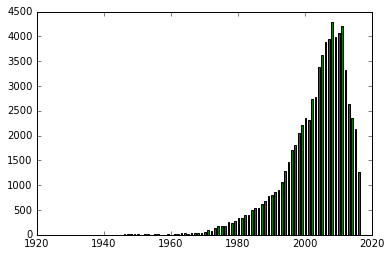

In [31]:
plt.bar(dict_years.keys(), dict_years.values(), 0.5, color='g')

In [32]:
data_cut = {}
for paper in list(data.keys()):
    try:
        if int(data[paper]['Publication date']) >= 1993:
            data_cut[paper] = data[paper]
    except:
        continue

## LABS

In [33]:
dict_lab_site, dict_labs, dict_labs_paper = lab_dictionaries(data_cut)

## Scrape EPFL STRUCTURE

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# From the root (EPFL): obtain the first level of the tree (schools)
req = requests.get('https://search.epfl.ch/ubrowse.action?acro=EPFL')
html = req.content

In [ ]:
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# Obtain the link for the schools
new_links_to_go = []
dictio = []
for i in soup.findAll('div', {'class':'unit_name'}):
    if i.findAll('a')[0].text.strip()[:6] == 'School':
        new_links_to_go += [i.findAll('a')[0].get('href')]
        dictio += [i.findAll('a')[0].text.strip()]

In [ ]:
#traverse_epfl_tree('https://search.epfl.ch/ubrowse.action?acro=SV')

In [ ]:
# Store the result related to each different school
#import pickle
#pickle.dump(prova, open('SV.p', 'wb')) # Store the variable in a file.

In [ ]:
# Get dictionary (lab,school)
def school_lab(dict_lab_site, name_school):
    
    school = pickle.load(open(name_school + '.p', 'rb')) # Recall 
    lab_school = {}
    for i in list(dict_lab_site.keys()):
        for nodes in list(school.keys()):
            list_node = school[nodes]
            if i in list_node:
                lab_school[i] = name_school
                break
            else:
                continue   
    
    return lab_school

In [ ]:
school_lab(dict_lab_site, 'IC')